In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn import model_selection

import itertools

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('drive')


def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat, labels=classes)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


rice_data = pd.read_csv("/content/drive/MyDrive/CSSI - Intermediate Course - Data Science/Final Project/Rice_MSC_Dataset.csv")
rice_data.head()


Mounted at drive


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio


In [2]:
#rice_data = rice_data.drop(columns=["CLASS"])
rice_data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,5551,285.911,114.1695,62.9079,0.8345,84.0699,0.9846,5638,0.6418,1.8149,...,103.9529,64.9225,62.4355,95.2780,65.5114,64.4457,0.2895,0.2997,0.3455,Arborio
74996,7696,322.703,121.3900,81.1375,0.7438,98.9892,0.9868,7799,0.7309,1.4961,...,108.9778,65.4571,59.9502,100.2301,67.5089,63.6028,0.3335,0.3426,0.4257,Karacadag
74997,7579,339.295,136.3125,71.2866,0.8524,98.2338,0.9805,7730,0.6399,1.9122,...,106.0881,64.1869,61.3876,97.1585,66.2445,63.0596,0.3028,0.3164,0.3761,Arborio
74998,15174,489.502,200.9486,97.6282,0.8740,138.9969,0.9766,15537,0.7903,2.0583,...,119.2037,63.3545,64.8200,109.3027,63.3122,63.5967,0.3970,0.4215,0.4469,Ipsala


In [3]:
rice_data = rice_data.drop(rice_data.iloc[:, 16:106], axis=1)
rice_data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,0.5114,0.4751,0.0269,0.0062,0.2257,0.9863,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,0.8120,0.7065,0.0184,0.0093,0.4992,0.9888,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,0.6505,0.5689,0.0277,0.0091,0.3236,0.9865,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,0.5256,0.5007,0.0252,0.0064,0.2507,0.9859,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,0.7944,0.6932,0.0189,0.0092,0.4806,0.9860,Arborio


In [4]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.base import BaseEstimator, TransformerMixin

rice_data_target = rice_data["CLASS"]
rice_data = rice_data.drop(["CLASS"], axis = 1)

numerical_features = list(rice_data)

pipeline = ColumnTransformer([
        ('std_scaler', StandardScaler(), numerical_features)
    ])

rice_data_prepared = pipeline.fit_transform(rice_data)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(rice_data_prepared, rice_data_target, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(60000, 16) (15000, 16) (60000,) (15000,)


In [6]:
#Logistic Regression w/o Penalty

log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty='none') #maybe make into knn or svm
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
log_score = log_reg.predict_proba(X_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test,y_pred)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test,y_pred,labels=None, pos_label=1, average='macro', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test,y_pred,labels=None, pos_label=1, average='macro', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test,y_pred,labels=None, pos_label=1, average='macro', sample_weight=None)))

Accuracy:    0.977000
Precision:   0.977167
Recall:      0.977190
F1 Score:    0.977166


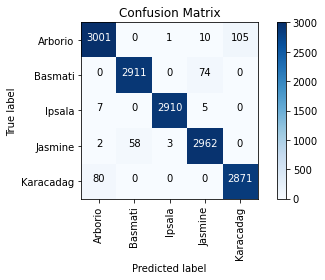

In [7]:
draw_confusion_matrix(y_test, y_pred, ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'])
#rice_data.head(10)

Accuracy:    0.976267
Precision:   0.976459
Recall:      0.976441
F1 Score:    0.976437


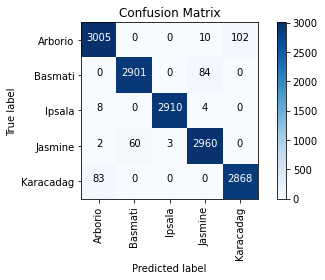

In [8]:
#Logistic Regression w/ l2 Penalty

log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty='l2')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
log_score = log_reg.predict_proba(X_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test,y_pred)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test,y_pred,labels=None, pos_label=1, average='macro', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test,y_pred,labels=None, pos_label=1, average='macro', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test,y_pred,labels=None, pos_label=1, average='macro', sample_weight=None)))

draw_confusion_matrix(y_test, y_pred, ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'])

In [9]:
'''
#KNN Optimizer
k_values = [1,2,3,5,7,9,10,20,200]
for k in k_values:
  knnclass = KNeighborsClassifier(n_neighbors=k)
  knnclass.fit(X_train, y_train)
  y_pred = knnclass.predict(X_test)
  print(k, "%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test,y_pred)))
'''

'\n#KNN Optimizer\nk_values = [1,2,3,5,7,9,10,20,200]\nfor k in k_values:\n  knnclass = KNeighborsClassifier(n_neighbors=k)\n  knnclass.fit(X_train, y_train)\n  y_pred = knnclass.predict(X_test)\n  print(k, "%-12s %f" % (\'Accuracy:\', metrics.accuracy_score(y_test,y_pred)))\n'

Accuracy:    0.978000
Precision:   0.978158
Recall:      0.978201
F1 Score:    0.978158


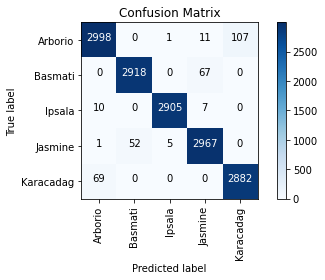

In [10]:
#KNN

knnclass = KNeighborsClassifier(n_neighbors=5)
knnclass.fit(X_train, y_train)
y_pred = knnclass.predict(X_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test,y_pred)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test,y_pred,labels=None, pos_label=1, average='macro', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test,y_pred,labels=None, pos_label=1, average='macro', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test,y_pred,labels=None, pos_label=1, average='macro', sample_weight=None)))

draw_confusion_matrix(y_test, y_pred, ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'])

In [11]:
#K Fold of Top 2
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True) 

# replace the two models below with what you picked
knn_model_kfold = KNeighborsClassifier(n_neighbors=5)
log_model_kfold = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty='none')

# Finally we pull it all together. We call cross val score to generate an accuracy performance score for our model
# we define our learning model, data, labels, and cross-val splitting strategy (all defined previously)
knn_results_kfold = model_selection.cross_val_score(knn_model_kfold, X_train, y_train, cv=kfold)
log_results_kfold = model_selection.cross_val_score(log_model_kfold, X_train, y_train, cv=kfold)

# Because we're collecting results from all runs, we take the mean value
print("For KNN Classifier our mean accuracy across folds is: %.2f%%" % (knn_results_kfold.mean()*100.0)) 
print("For Logistic Regression our mean accuracy across folds is: %.2f%%" % (log_results_kfold.mean()*100.0))

For KNN Classifier our mean accuracy across folds is: 97.92%
For Logistic Regression our mean accuracy across folds is: 97.76%
